In [163]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [164]:
df=sns.load_dataset('titanic')

In [165]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [166]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [168]:
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [169]:
# dropping the column
df.drop(columns='deck',inplace=True)

In [170]:
df['age']=df.age.fillna(value=df['age'].mean())

In [171]:
df['embarked']=df.embarked.fillna(value=df['embarked'].mode()[0])

In [172]:
df['embark_town']=df.embark_town.fillna(value=df['embark_town'].mode()[0])

In [173]:
df.isnull().sum()/len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

In [174]:
df.shape

(891, 14)

# Outliers Removal

# Visulization Wala Method 

<AxesSubplot:xlabel='sex', ylabel='age'>

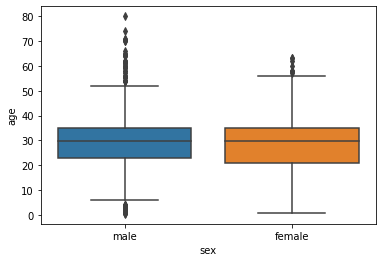

In [175]:
import seaborn as sns 
sns.boxplot(data=df, y='age', x='sex')

# IQR Method (Inter Quartitle Range Method)

In [176]:
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR= Q3 - Q1
IQR
lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR

df=df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]

In [177]:
df.shape

(825, 14)

In [178]:
# fare Outliers Removal 
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR= Q3 - Q1
IQR
lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR

df=df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]

In [179]:
df.shape

(718, 14)

In [180]:
# How many outliers remove from the previous 
576-498

78

<AxesSubplot:xlabel='age', ylabel='Count'>

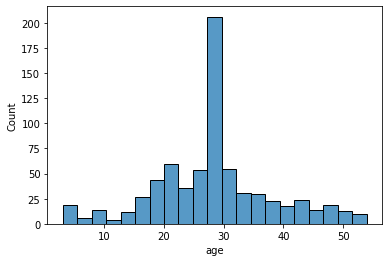

In [181]:
sns.histplot(df['age'])

<AxesSubplot:xlabel='fare', ylabel='Count'>

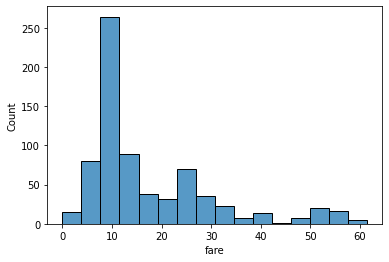

In [182]:
sns.histplot(df['fare'])

In [183]:
# # Zscore Method
# # pip install scipy
# from scipy import stats
# import numpy as np 
# zscore = np.abs(stats.zscore(df['age']))
# threshold = 3
# df= df[(zscore<threshold)]
# zscore = np.abs(stats.zscore(df['fare']))
# threshold = 3
# df= df[(zscore<threshold)]
# df.head()



# Finding and dropping the duplicates 

In [184]:
df.shape

(718, 14)

In [185]:
# finding the duplicates 
df.duplicated().sum()

103

In [186]:
df_duplicates=df[df.duplicated()]
df_duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [187]:
df.shape

(718, 14)

In [188]:
df.drop_duplicates(inplace=True)

In [153]:
df.shape

(615, 14)

# Data Normalization

In [227]:
#1. pip install scikit-learn
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler #minmaxscaler is an API 
#2. data 
df
#3. select columns to normalize 
cols_to_normalize =['age', 'fare']
#4. create the scale function /tool  
scaler=MinMaxScaler()
#5. Fit and transform the data on scaler or vice versa
df[cols_to_normalize]= scaler.fit_transform(df[cols_to_normalize])
#6. check the data 
df



,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,0,5,0.474509,Q,Third,woman,False,Queenstown,no,False,5
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,0.523512,1,2,0.382051,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True,0


In [228]:
# #1. pip install scikit-learn(Usinf Standard Scaler)
# import pandas as pd 
# from sklearn.preprocessing import StandardScaler #StandardScaler is an API 
# #2. data 
# df
# #3. select columns to normalize 
# cols_to_normalize =['age', 'fare']
# #4. create the scale function /tool  
# scaler=StandardScaler()
# #5. Fit and transform the data on scaler or vice versa
# df[cols_to_normalize]= scaler.fit_transform(df[cols_to_normalize])
# #6. check the data 
# df

In [229]:
df.describe()

,survival,pclass,age,sibsp,parch,fare,family_size
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.360976,2.469919,0.497584,0.460163,0.365854,0.298831,0.826016
std,0.480674,0.741063,0.209485,0.894039,0.835572,0.221334,1.435011
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.372549,0.000000,0.000000,0.128640,0.000000
50%,0.000000,3.000000,0.523512,0.000000,0.000000,0.211798,0.000000
75%,1.000000,3.000000,0.607843,1.000000,0.000000,0.423596,1.000000
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000,7.000000


# log Transformation 

In [230]:
kashti=sns.load_dataset('titanic')
kashti


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [231]:
# kashti['age']=kashti['age'].fillna(kashti['age'].median())
# kashti['fare']=kashti['fare'].fillna(kashti['fare'].median())
# #log transform - log lenay se values chotay scale main ajati hain 
# kashti['age']=np.log(kashti['age'])
# kashti['fare']=np.log(kashti['fare'])
# kashti.head()

<AxesSubplot:xlabel='sex', ylabel='fare'>

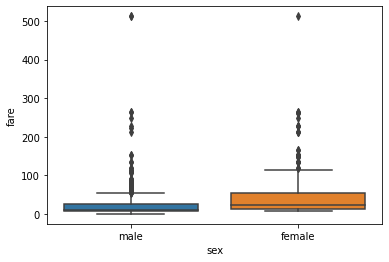

In [232]:
sns.boxplot(data=kashti, x='sex', y='fare')

<AxesSubplot:xlabel='age', ylabel='Count'>

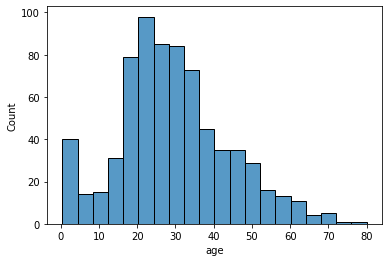

In [233]:
sns.histplot(kashti['age']) # see log lenay se age ka pattern kharab hogaya hay so this doen't suit on age 

# Organizing the data

In [234]:
#adding a new column 
df['family_size']=df['sibsp']+df['parch']
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

<AxesSubplot:xlabel='family_size', ylabel='Count'>

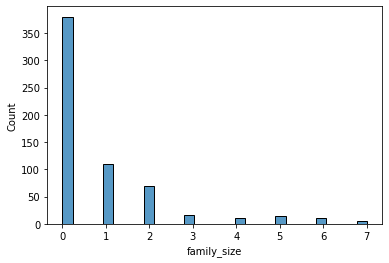

In [235]:
sns.histplot(df['family_size'])

c:\Users\Rizwan Rizwan\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Rizwan Rizwan\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='age'>

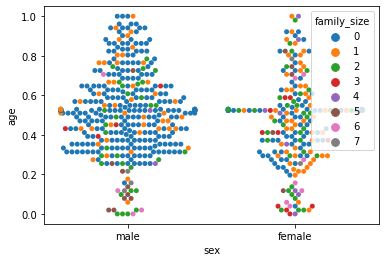

In [236]:
sns.swarmplot(data=df, x='sex', y='age', hue='family_size')

# Renaming the Column 

In [237]:
df=df.rename(columns={'survived':'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

# Pivot table

In [238]:
table=pd.pivot_table(df,values='age',index='pclass',
    columns="survival", aggfunc=np.sum)
table

survival,0,1
pclass,,
1,25.958616,32.874371
2,40.694083,33.574441
3,133.977618,38.934931


<AxesSubplot:xlabel='fare', ylabel='age'>

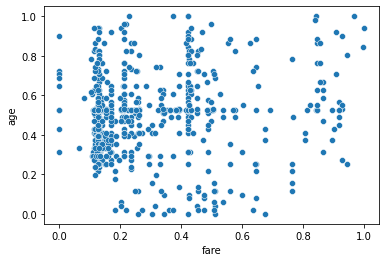

In [239]:
sns.scatterplot(data=df, x='fare',y='age')

In [240]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True,0


# Cleaned the data Finally...now its time to save in CSV format

In [241]:
# saving the wrangled data 
df.to_csv("preprocessed_data.csv")

<AxesSubplot:xlabel='family_size', ylabel='age'>

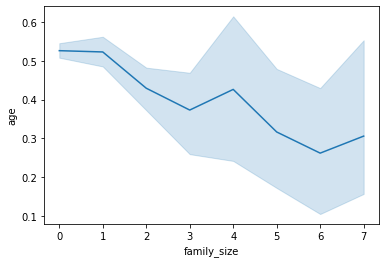

In [243]:
# line plot just to realize
sns.lineplot(data=df, x='family_size', y='age')

<AxesSubplot:xlabel='fare', ylabel='age'>

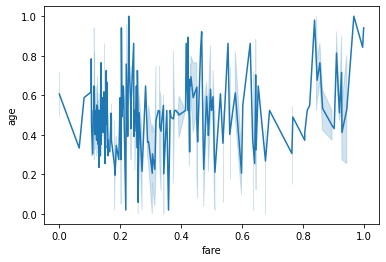

In [244]:
sns.lineplot(data=df, x='fare', y='age')